# Import necessary libraries

In [29]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import yaml  # load the config file
import math

# Get one frame of image

In [30]:
import cv2

cap = cv2.VideoCapture(0)
ret, img = cap.read()
print(ret)
print(img)
print(type(img),img.shape)

True
[[[ 56  32  22]
  [ 36  15   4]
  [ 45  28  16]
  ...
  [139 132 129]
  [138 131 128]
  [137 130 127]]

 [[ 54  25  17]
  [ 53  27  18]
  [ 80  61  51]
  ...
  [139 132 129]
  [138 131 128]
  [137 130 127]]

 [[ 46  11   7]
  [ 90  59  54]
  [114  94  87]
  ...
  [138 133 128]
  [138 133 128]
  [137 132 127]]

 ...

 [[100 109  93]
  [101 110  94]
  [101 110  94]
  ...
  [  0   7   0]
  [  0   7   0]
  [  0   7   0]]

 [[ 99 109  94]
  [ 98 109  94]
  [ 98 109  94]
  ...
  [  0   6   0]
  [  0   6   0]
  [  0   6   0]]

 [[ 95 106  93]
  [ 95 106  93]
  [ 95 106  93]
  ...
  [  0   6   0]
  [  0   6   0]
  [  0   6   0]]]
<class 'numpy.ndarray'> (480, 640, 3)


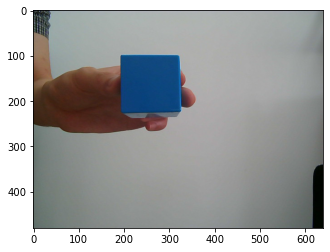

In [32]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Image processing

In [33]:
img_copy = img.copy()
size = (640, 480)
frame_resize = cv2.resize(img_copy, size, interpolation=cv2.INTER_NEAREST)
frame_resize.shape

(480, 640, 3)

In [34]:
frame_resize == img

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

## Gaussian blur (smoothing)
In terms of image processing, any sharp edges in images are smoothed while minimizing too much blurring.

In [48]:
frame_gb = cv2.GaussianBlur(frame_resize, (3, 3), 3) 
# (3,3) is the kernal size, 3 is the standard deviation along x axis

In [45]:
img.dtype

dtype('uint8')

## LAB color space
- **L**: Lightness
- **A**: Red/Green value
- **B**: Blue/Yellow value

Since the image has 8 bits, the range of LAB values are all 0-255 according to the [OpenCV documents (RGB ↔ CIE L*a*b*)](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#color_convert_rgb_lab)

Text(0.5, 1.0, 'original')

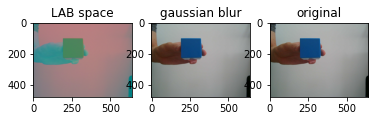

In [35]:
frame_lab = cv2.cvtColor(frame_gb, cv2.COLOR_RGB2LAB)

plt.subplot(1,3,1)
plt.imshow(frame_lab)
plt.title("LAB space")

plt.subplot(1,3,2)
plt.imshow(frame_gb)
plt.title("gaussian blur")

plt.subplot(1,3,3)
plt.imshow(img)
plt.title("original")

In [36]:
def get_yaml_data(yaml_file):
    file = open(yaml_file, 'r', encoding='utf-8')
    file_data = file.read()
    file.close()
    
    data = yaml.load(file_data, Loader=yaml.SafeLoader)
    
    return data

In [37]:
lab_file_path = "lab_config.yaml"
lab_data = get_yaml_data(lab_file_path)
print(lab_data)

{'black': {'max': [89, 255, 255], 'min': [0, 0, 0]}, 'blue': {'max': [255, 255, 108], 'min': [0, 0, 0]}, 'green': {'max': [150, 120, 160], 'min': [60, 0, 100]}, 'red': {'max': [255, 255, 255], 'min': [0, 140, 100]}, 'white': {'max': [255, 255, 255], 'min': [193, 0, 0]}, 'gray': {'max': [200, 180, 120], 'min': [20, 110, 110]}}


### cv2.inRange(sourcearray, upperboundarray, lowerboundarray)
- **Return**: the array representing the elements equal to either 255 or 0 returned from inRange() function.
- Returns an array consisting of elements equal to 255(white) if the elements of the source array **lie between** the elements of the two arrays representing the upper bounds and the lower bounds.
- The inRange() function returns an array consisting of elements equal to 0(black) if the elements of the source array **lie outside** the elements of the two arrays representing the upper bounds and the lower bounds.

blue
{'max': [255, 255, 108], 'min': [0, 0, 0]}


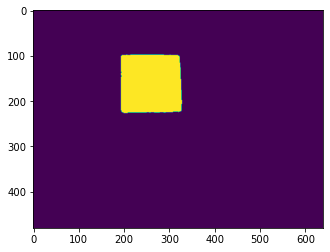

In [38]:
__target_color = ('blue')
for i in lab_data: # i=black,blue,grenn ....
    if i in __target_color:
        print(i)
        print(lab_data[i])
        frame_mask = cv2.inRange(frame_lab,
                                (lab_data[i]['min'][0],
                                 lab_data[i]['min'][1],
                                 lab_data[i]['min'][2]),
                                
                                (lab_data[i]['max'][0],
                                 lab_data[i]['max'][1],
                                 lab_data[i]['max'][2]))
        color_area_max = i
plt.imshow(frame_mask)

# Morphological Transformations
## Erosion
- It erodes away the boundaries of foreground object (Always try to keep foreground in white). 
- The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 255 or 0) will be considered 255 only if all the pixels under the kernel is 255, otherwise it is eroded (made to zero).
- All the pixels near boundary will be discarded depending upon the size of kernel.

## Dilation
- Opposite of erosion
- A pixel element is ‘255’ if at least one pixel under the kernel is ‘255. 
- It increases the white region in the image or size of foreground object increases.

Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

## Opening
- **Erosion** followed by **dilation**
- Useful in removing noise
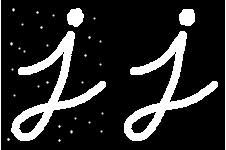

## Closing
- **Dilation** followed by **Erosion**
- Useful in closing small holes inside the foreground objects, or small black points on the object
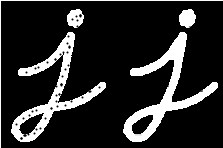

False
False


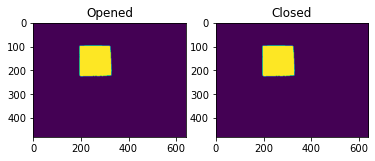

In [39]:
opened = cv2.morphologyEx(frame_mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))

plt.subplot(1,2,1)
plt.imshow(opened)
plt.title("Opened")

plt.subplot(1,2,2)
plt.imshow(closed)
plt.title("Closed")

print((opened==frame_mask).all())
print((closed==opened).all())

In [40]:
# cv2.RETR_EXTERNAL: outer contour
# cv2.CHAIN_APPROX_NONE: absolutely all contour points
# [-2]: get contours, return value: contours, hierarchy
contours = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]
contours

(array([[[215,  98]],
 
        [[214,  99]],
 
        [[213,  99]],
 
        ...,
 
        [[218,  98]],
 
        [[217,  98]],
 
        [[216,  98]]], dtype=int32),)

In [41]:
def getAreaMaxContour(contours):
    
    contour_area_temp = 0
    contour_area_max = 0
    area_max_contour = None

    for c in contours:  
        contour_area_temp = math.fabs(cv2.contourArea(c))  
        if contour_area_temp > contour_area_max:
            contour_area_max = contour_area_temp
            if contour_area_temp > 300:  
                area_max_contour = c

    return area_max_contour, contour_area_max  

In [42]:
areaMaxContour, area_max = getAreaMaxContour(contours) 
print(areaMaxContour)
print(area_max)

[[[215  98]]

 [[214  99]]

 [[213  99]]

 ...

 [[218  98]]

 [[217  98]]

 [[216  98]]]
16584.0


In [43]:
if area_max > 500:
    # (center(x, y), (width, height), angle of rotation)
    rect = cv2.minAreaRect(areaMaxContour)
    print(rect)
    box = cv2.boxPoints(rect)
    print(box)
    # convert to integer type
    box = np.int0(box) # equivalent to np.int32 or np.int64 depending upon the system architecture
    print(box)

((261.0, 162.0), (128.0, 134.0), 90.0)
[[194.  98.]
 [328.  98.]
 [328. 226.]
 [194. 226.]]
[[194  98]
 [328  98]
 [328 226]
 [194 226]]


# Show the image with a bounding box

blue


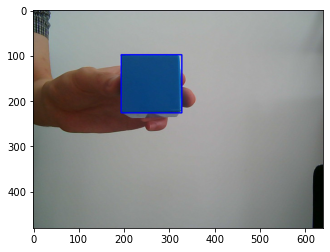

In [44]:
range_rgb = {
    'red':   (255, 0, 0),
    'blue':  (0, 0, 255),
    'green': (0, 255, 0),
    'black': (0, 0, 0),
    'white': (255, 255, 255)}
print(color_area_max)
cv2.drawContours(img, [box], -1, range_rgb[color_area_max], 2)
plt.imshow(img)